### Insert worm

In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps
import importlib
importlib.reload(pimc)

<module 'pimc' from '/Users/ecasiano/Desktop/LatticePIMC/src/pimc.py'>

### Simulation parameters

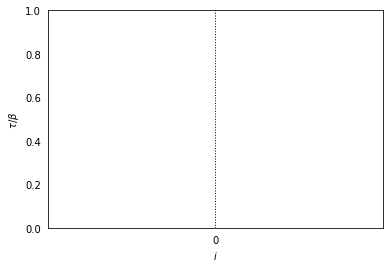

In [2]:
importlib.reload(pimc)
# Simulation parameters
t = 0
U = 1
mu = 1
    
# PIMC parameters
beta = 1
eta = 1      # worm end fugacity

# Canonical or Grand Canonical?
canonical = False

# Create a worldline configuration
L = 1
N = 0
alpha = []
for i in range(L):
    alpha.append(N)
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []
pimc.view_worldlines(data_struct,beta,figure_name=None)

### Do many inserts

In [3]:
importlib.reload(pimc)

# Do insert many times on the above configuration
mc_steps = int(1E+05)
worm_lengths = np.zeros(mc_steps)  # create array to save worm lengths
need_dV = True # Flag to see if dV has been calculated alrady or not 
insert = 0 # Count accepted inserts
proposals = 0
for m in range(mc_steps):

    # Attempt to delete the worm
    pimc.worm_delete(data_struct,beta,head_loc,tail_loc,U,mu,eta,canonical,N)
    if head_loc == [] and tail_loc == []:
        proposals += 1
        insert += pimc.worm_insert(data_struct, beta, head_loc, tail_loc, U, mu, eta,canonical, N)
 
    # Don't collect wormlength data if no insertion was done
    if head_loc == [] or tail_loc == []: continue
    
    # Calculate change in diagonal energy after/before worm end (need this for scale)
    if need_dV:
        n_f = data_struct[tail_loc[0]][tail_loc[1]][1]   
        n_o = data_struct[head_loc[0]][head_loc[1]][1] 
        dV = (U/2)*(n_f*(n_f-1)-n_o*(n_o-1)) - mu*(n_f-n_o)
        need_dV = False
        
    # Times of head and tail
    tau_h = data_struct[head_loc[0]][head_loc[1]][0]
    tau_t = data_struct[tail_loc[0]][tail_loc[1]][0]
    
    worm_lengths[m] = tau_h-tau_t
    is_worm = True
    if worm_lengths[m] < 0: # antiworm correction
        worm_lengths[m] += beta
        is_worm = False
    
    if m == mc_steps - 1: break
        
   
pimc.view_worldlines(data_struct,beta,figure_name=None);

0.028344272230052956
0.21052763998258764
0.31291794793926403
0.2950787717793677
0.3352550567655737
0.2998260776606201
0.1599679849157914
0.02214453240886475
0.5426648571350998
0.5472948503257845
0.04811690808017932
0.331460668126268
0.21120821925874883
0.6188602531879607
0.11235391493540788
0.22181271741604955
0.5887509464934032
0.2618763640080689
0.6032378900621116
0.08601208735797997
0.2013548743972912
0.6164300838363344
0.2099401136862421
0.32472267633130947
0.2970805444830099
0.3332009304172772
0.17655830843467527
0.39208346325335325
0.05770354875405332
0.06284673096073791
0.16865101077128578
0.5009249026341558
0.1732311775280017
0.40253683425004966
0.18976393762454943
0.31944669117783997
0.38556430599914443
0.3493020491604213
0.16550730616613837
0.32462214863971883
0.10455428349360991
0.002353757894699415
0.16300260899008517
0.2105872211317172
0.5884225265000789
0.5527063787941441
0.14547199982093484
0.014784551886428061
0.09479738333114897
0.313468247525412
0.08576316589206821
0.

KeyboardInterrupt: 

In [ ]:
# Acceptance ratio
print("Acceptance: %.4f%%"%(100*insert/proposals))

In [432]:
proposals

100000

In [433]:
# Histogram of worm lengths
b = beta
loc = 0

if dV == 0:
    dV = np.finfo(float).eps # machine epsilon
scale = 1/abs(dV)

# Generate truncated exponential distribution of worm lengths
tau_w = np.linspace(0,beta,int(1E+02+1))                    # worm lengths
tau_w = (tau_w[1:]+tau_w[0:-1])/2    
#[time,N,(src,dest)]

# Theoretical distribution of lenghths (worm and antiworm)
pdf = truncexpon.pdf(tau_w,b=b/scale,loc=loc,scale=scale)
if (dV < 0):
    pdf = truncexpon.pdf(-tau_w+b,b=b/scale,loc=loc,scale=scale)

pdf /= simps(pdf,tau_w)

# Sampled worm lengths
n, bins = np.histogram(worm_lengths, bins=tau_w, density=1) # for histogram

dV:  -1.0


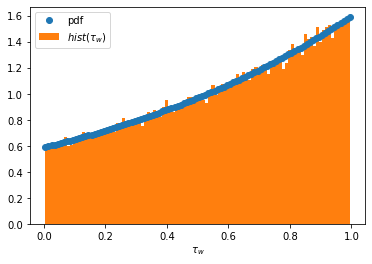

In [434]:
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(tau_w,pdf,label='pdf',linestyle='None',marker='o')
ax.hist(worm_lengths,bins=bins,density=True,histtype='stepfilled',alpha=1,label=r'$hist(\tau_w)$')
ax.set_xlabel(r"$\tau_w$") ;
#ax.set_yscale("log");
plt.legend() ;
print("dV: ",dV)
plt.savefig("insert_%d_%d_%.4f_%.4f_%.4f_%.4f_%d_worm.pdf"%(L,N,U,mu,t,eta,mc_steps))

In [435]:
# Histogram of tau_w (WORM LENGTH, not antiworm)

# Move: Insert

# Insert worm
    # dV < 0: increasing truncexpon
    # dV == 0: flat distribution
    # dV > 0: decreasing truncexpon
    
# Insert antiworm
#     dV < 0: increasing truncexpon
#     dV == 0: flat distribution
#     dV > 0: decreasing truncexpon

# NOTE: THE PLOTS WERE DONE AT FIXED R=1